# Assignment 2


## imports

In [211]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## 1

### Import from the csv file

In [212]:
data = genfromtxt('Q1.csv', delimiter=',')

data_feature_name = ['Oral','Written','Acceptance']



In [213]:
df = pd.DataFrame(data,columns = data_feature_name)

In [214]:
df.Acceptance


0     0.0
1     0.0
2     0.0
3     1.0
4     1.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Name: Acceptance, Length: 100, dtype: float64

### 1.1 Create Train and test data (70% of the data belongs to Training)

In [215]:
X = df.drop(['Acceptance'],axis = 'columns')
Y = df['Acceptance']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)


Text(0, 0.5, 'Written')

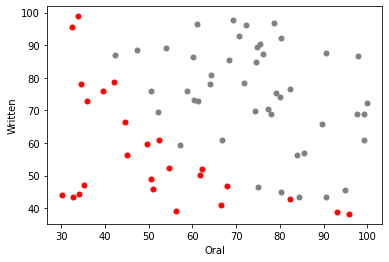

In [216]:
df_train = pd.DataFrame(X_train,columns = data_feature_name[:2])
df_train['Acceptance'] = Y_train

plt.scatter(df_train[df_train.Acceptance == 0]['Oral'], df_train[df_train.Acceptance == 0]['Written'],color = 'red', marker = '.' , s = 100)
plt.scatter(df_train[df_train.Acceptance == 1]['Oral'], df_train[df_train.Acceptance == 1]['Written'],color = 'gray', marker = '.' , s = 100)

plt.xlabel('Oral')
plt.ylabel('Written')

### 1.2

In [217]:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
print(f"train score: {clf.score(X_train,Y_train)}")
print(f"test score: {clf.score(X_test,Y_test)}")

train score: 0.8857142857142857
test score: 0.9333333333333333


Text(0, 0.5, 'Written')

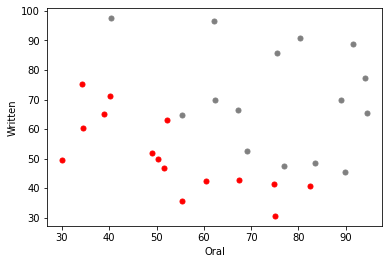

In [218]:
df_test = pd.DataFrame(X_test,columns = data_feature_name[:2])
df_test['Acceptance'] = Y_test



plt.scatter(df_test[df_test.Acceptance == 0]['Oral'], df_test[df_test.Acceptance == 0]['Written'],color = 'red', marker = '.' , s = 100)
plt.scatter(df_test[df_test.Acceptance == 1]['Oral'], df_test[df_test.Acceptance == 1]['Written'],color = 'gray', marker = '.' , s = 100)

plt.xlabel('Oral')
plt.ylabel('Written')

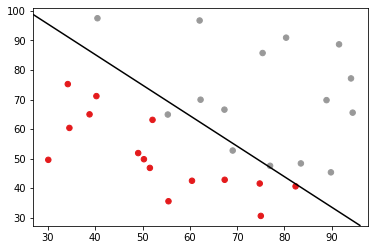

In [219]:
X = df_test.values
plt.scatter(X[:,0],X[:,1],c=Y_test,s=30,cmap=plt.cm.Set1)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)

YY, XX = np.meshgrid(yy,xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors = 'k',levels=[0])
plt.show()



## 2

### 2.1

In [220]:
data = genfromtxt('Q2.csv', delimiter=',')

data_feature_name = ['f1','f2','Acceptance']
df = pd.DataFrame(data,columns = data_feature_name)

In [221]:
X = df.drop(['Acceptance'],axis = 'columns')
Y = df['Acceptance']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

Text(0, 0.5, 'f2')

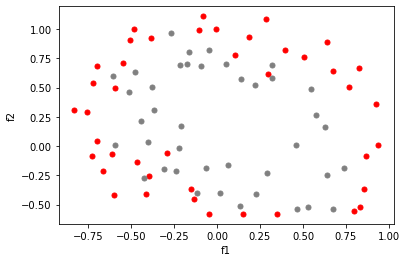

In [222]:
df_train = pd.DataFrame(X_train,columns = data_feature_name[:2])
df_train['Acceptance'] = Y_train

plt.scatter(df_train[df_train.Acceptance == 0]['f1'], df_train[df_train.Acceptance == 0]['f2'],color = 'red', marker = '.' , s = 100)
plt.scatter(df_train[df_train.Acceptance == 1]['f1'], df_train[df_train.Acceptance == 1]['f2'],color = 'gray', marker = '.' , s = 100)

plt.xlabel('f1')
plt.ylabel('f2')

### 2.2

In [223]:
trans = PolynomialFeatures(degree=4)
X_new = trans.fit_transform(X)
#print(X_new[0])
#print(X_new.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y,test_size=0.3)

#no regularization
clf = LogisticRegression(penalty='none', max_iter=1000).fit(X_train, Y_train)
print(f"Train: {clf.score(X_train,Y_train)}")
print(f"Test: {clf.score(X_test,Y_test)}")

Train: 0.8780487804878049
Test: 0.7777777777777778


### 2.3  

In [224]:
clf = LogisticRegression(C=0.01, max_iter=1000).fit(X_train, Y_train)
print(f"Train: {clf.score(X_train,Y_train)}")
print(f"Test: {clf.score(X_test,Y_test)}")

Train: 0.5365853658536586
Test: 0.3888888888888889


In [225]:
clf = LogisticRegression(C=2, max_iter=1000).fit(X_train, Y_train)
print(f"Train: {clf.score(X_train,Y_train)}")
print(f"Test: {clf.score(X_test,Y_test)}")

Train: 0.8780487804878049
Test: 0.7222222222222222


In [226]:
clf = LogisticRegression(C=120, max_iter=1000).fit(X_train, Y_train)
print(f"Train: {clf.score(X_train,Y_train)}")
print(f"Test: {clf.score(X_test,Y_test)}")

Train: 0.8658536585365854
Test: 0.7777777777777778


### با در نظر گرفتن ضریب منظم سازی مناسب می توان نتیجه بهتری در داده ها تست بدست آورد

## 3

### 3.1

In [227]:
data = genfromtxt('Q3_1.csv', delimiter=',')

data_feature_name = ['f1','f2','Acceptance']
df = pd.DataFrame(data,columns = data_feature_name)

In [228]:
X = df.drop(['Acceptance'],axis = 'columns')
Y = df['Acceptance']


Text(0, 0.5, 'f2')

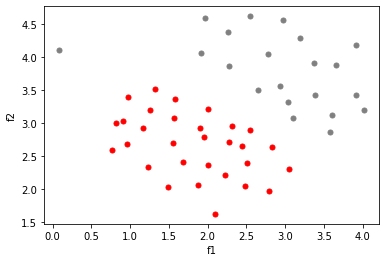

In [229]:


plt.scatter(df[df.Acceptance == 0]['f1'], df[df.Acceptance == 0]['f2'],color = 'red', marker = '.' , s = 100)
plt.scatter(df[df.Acceptance == 1]['f1'], df[df.Acceptance == 1]['f2'],color = 'gray', marker = '.' , s = 100)

plt.xlabel('f1')
plt.ylabel('f2')

In [230]:
def svm_plot(df_test,Y_test, model):
    X = df_test.values
    plt.scatter(X[:,0],X[:,1],c=Y_test,s=30,cmap=plt.cm.Set1)
    ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0],xlim[1],30)
    yy = np.linspace(ylim[0],ylim[1],30)

    YY, XX = np.meshgrid(yy,xx)

    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX,YY,Z,colors = 'k',levels=[-1,0,1],alpha = 0.5,linestyles = ['--','-','--'])
    ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s = 100, linewidths=1,facecolors='none',edgecolors='black')
    plt.show()


0.9803921568627451


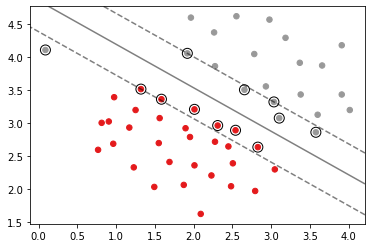

In [231]:
model = SVC(kernel='linear',C = 1)
model.fit(X,Y)
print(model.score(X,Y))
svm_plot(df,Y, model)

0.9607843137254902


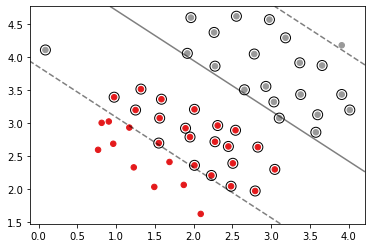

In [232]:
model = SVC(kernel='linear',C = 0.03)
model.fit(X,Y)
print(model.score(X,Y))
svm_plot(df,Y, model)

0.9803921568627451


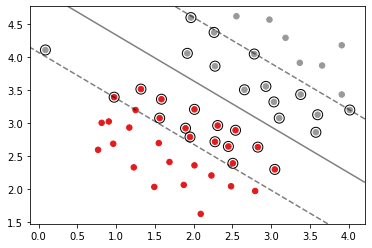

In [233]:
model = SVC(kernel='linear',C = 0.1)
model.fit(X,Y)
print(model.score(X,Y))
svm_plot(df,Y, model)

0.9803921568627451


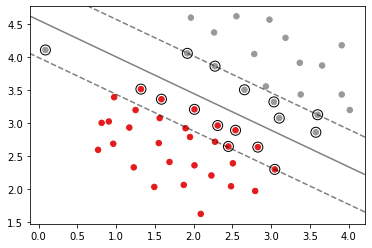

In [234]:
model = SVC(kernel='linear',C = 0.5)
model.fit(X,Y)
print(model.score(X,Y))
svm_plot(df,Y, model)

0.9803921568627451


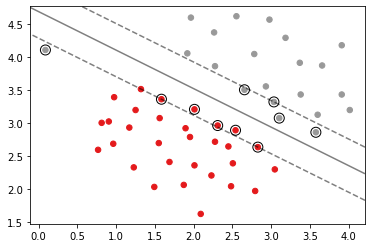

In [235]:
model = SVC(kernel='linear',C = 1.5)
model.fit(X,Y)
print(model.score(X,Y))
svm_plot(df,Y, model)

0.9803921568627451


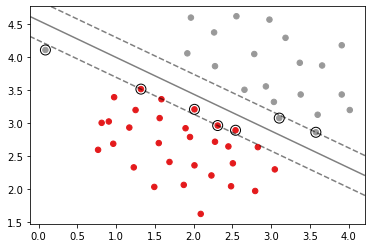

In [236]:
model = SVC(kernel='linear',C = 5)
model.fit(X,Y)
print(model.score(X,Y))
svm_plot(df,Y, model)

0.9803921568627451


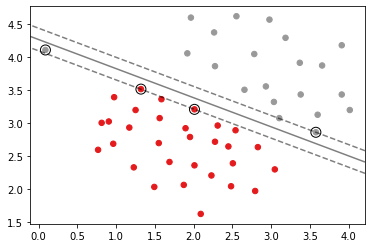

In [237]:
model = SVC(kernel='linear',C = 20)
model.fit(X,Y)
print(model.score(X,Y))
svm_plot(df,Y, model)

1.0


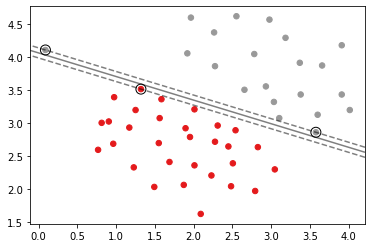

In [238]:
model = SVC(kernel='linear',C = 120)
model.fit(X,Y)
print(model.score(X,Y))
svm_plot(df,Y, model)

1.0


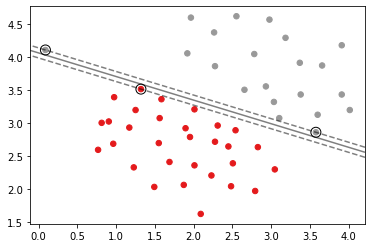

In [239]:
model = SVC(kernel='linear',C = 1000)
model.fit(X,Y)
print(model.score(X,Y))
svm_plot(df,Y, model)

#### the more C increases the margin gets smaller which means that the score of training data will increases. On the other hand, can be seen that the score of test data decreases.

#### When C is smaller than 1, the accuracy of both traning and test data drops significantly because of larger margin.

#### It is worth mentioning that when the margin increases the number of support vectors increases too.

### 3.2


In [240]:
data = genfromtxt('Q3_2.csv', delimiter=',')

data_feature_name = ['f1','f2','Acceptance']
df = pd.DataFrame(data,columns = data_feature_name)

In [241]:
X = df.drop(['Acceptance'],axis = 'columns')
Y = df['Acceptance']


Text(0, 0.5, 'f2')

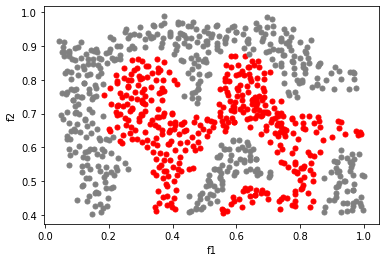

In [242]:


plt.scatter(df[df.Acceptance == 0]['f1'], df[df.Acceptance == 0]['f2'],color = 'red', marker = '.' , s = 100)
plt.scatter(df[df.Acceptance == 1]['f1'], df[df.Acceptance == 1]['f2'],color = 'gray', marker = '.' , s = 100)

plt.xlabel('f1')
plt.ylabel('f2')

0.9721900347624566


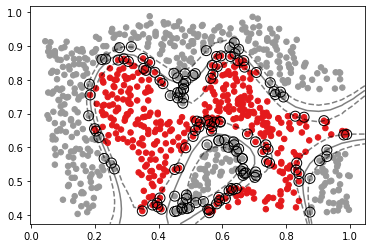

In [243]:

model = SVC(kernel='rbf',C=150)
model.fit(X,Y)
print(model.score(X,Y))
svm_plot(df,Y, model)

### 3.3

In [244]:
data = genfromtxt('Q3_3.csv', delimiter=',')

data_feature_name = ['f1','f2','Acceptance']
df = pd.DataFrame(data,columns = data_feature_name)

In [245]:
X = df.drop(['Acceptance'],axis = 'columns')
Y = df['Acceptance']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

Text(0, 0.5, 'f2')

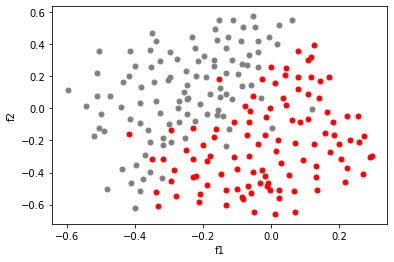

In [246]:
df_train = pd.DataFrame(X_train,columns = data_feature_name[:2])
df_train['Acceptance'] = Y_train

df_test = pd.DataFrame(X_test,columns = data_feature_name[:2])
df_test['Acceptance'] = Y_test


plt.scatter(df[df.Acceptance == 0]['f1'], df[df.Acceptance == 0]['f2'],color = 'red', marker = '.' , s = 100)
plt.scatter(df[df.Acceptance == 1]['f1'], df[df.Acceptance == 1]['f2'],color = 'gray', marker = '.' , s = 100)

plt.xlabel('f1')
plt.ylabel('f2')

![sss](1.png "hi")
###
![sss](2.jpg "hi")

#### based on these two pictures, the gamma can be found using the following formula

![sss](3.jpg "hi")

In [247]:
values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
max_score = -1
max_values = []


for i in range(len(values)):
    for j in range(len(values)):
        model = SVC(kernel='rbf',C=values[i],gamma= 1/ (2* (values[j]**2))).fit(X_train,Y_train)
        current_score = model.score(X_test,Y_test)
        print(f"Current score: {current_score} C: {values[i]} gamma: {values[j]} Max score: {max_score}")
        if(current_score > max_score):
            max_score = current_score
            if(len(max_values) != 0):
                max_values.pop()
            max_values.append((values[i],values[j]))

print("------------------------------------------------")
print("(C , gamma)")
print(max_values)

Current score: 0.46875 C: 0.01 gamma: 0.01 Max score: -1
Current score: 0.46875 C: 0.01 gamma: 0.03 Max score: 0.46875
Current score: 0.46875 C: 0.01 gamma: 0.1 Max score: 0.46875
Current score: 0.46875 C: 0.01 gamma: 0.3 Max score: 0.46875
Current score: 0.46875 C: 0.01 gamma: 1 Max score: 0.46875
Current score: 0.46875 C: 0.01 gamma: 3 Max score: 0.46875
Current score: 0.46875 C: 0.01 gamma: 10 Max score: 0.46875
Current score: 0.46875 C: 0.01 gamma: 30 Max score: 0.46875
Current score: 0.46875 C: 0.03 gamma: 0.01 Max score: 0.46875
Current score: 0.46875 C: 0.03 gamma: 0.03 Max score: 0.46875
Current score: 0.46875 C: 0.03 gamma: 0.1 Max score: 0.46875
Current score: 0.84375 C: 0.03 gamma: 0.3 Max score: 0.46875
Current score: 0.46875 C: 0.03 gamma: 1 Max score: 0.84375
Current score: 0.46875 C: 0.03 gamma: 3 Max score: 0.84375
Current score: 0.46875 C: 0.03 gamma: 10 Max score: 0.84375
Current score: 0.46875 C: 0.03 gamma: 30 Max score: 0.84375
Current score: 0.46875 C: 0.1 gamma: 

0.9047619047619048
0.984375


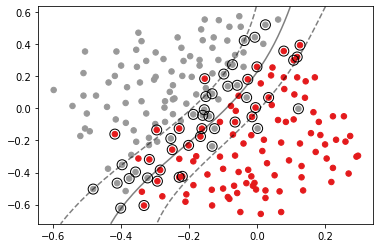

In [248]:
model = SVC(kernel='rbf',C=max_values[0][0], gamma = max_values[0][1])
model.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))
svm_plot(df,Y, model)

## 4

### 4.1

In [249]:
data = pd.read_csv('Q4.csv').values
data_feature_name = ["sepal.length","sepal.width","petal.length","petal.width","variety"]
df = pd.DataFrame(data,columns = data_feature_name)


In [250]:
X = df.drop(['variety'],axis = 'columns')
Y = df['variety']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

### 4.2

In [251]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, Y_train)

print(f"Train: {neigh.score(X_train,Y_train)}")

print(f"Test: {neigh.score(X_test,Y_test)}")


Train: 0.9904761904761905
Test: 0.9555555555555556


### 4.3

7


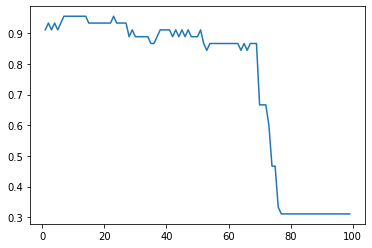

In [252]:
scores = []
max_score = -1
max_score_index = -1
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    current_test_score = neigh.score(X_test,Y_test)
    if(current_test_score > max_score):
        max_score = current_test_score
        max_score_index = i
    scores.append((i,neigh.score(X_test,Y_test)))

arr = np.array(scores)
print(max_score_index)
plt.plot(arr[:,0],arr[:,1])